In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [53]:
script_dir = 'LFR_Results/'

In [54]:
stochastic_algos=['causality','team_cs','tripleahc','zhenhua','walktrap','spin_glass']
greedy_algos=['csbio_iitm','fast_greedy','luminex','nextmr']
kernel_algos=['spectral_clustering','tuskdmi','bigs2','blue_genes','sim_net']
hierarchy_algos=['nextmr','tsuromi_ono','csbio_hier','blue_genes','tianle','sim_net']
local_algos=['label_propagation','sealang_brown']
algo_map={'causality':'MLRMCL','team_cs':'Recursive_Infomap','tripleahc':'Recursive_Walktrap','zhenhua':'Walktrap_infomap','walktrap':'walktrap','spin_glass':'spin_glass',
'csbio_iitm':'louvain','fast_greedy':'fast_greedy','luminex':'multiplex-lovain','nextmr':'TOM_hier','spectral_clustering':'spectral_clustering',
'tuskdmi':'DSD_kernel','bigs2':'Iterative_SC','blue_genes':'exp-laplacian_kernel','sim_net':'sc_agg',
'tsuromi_ono':'dcut','csbio_hier':'hamming_ensemble','tianle':'SVT','label_propagation':'label_propagation','sealang_brown':'shared_neighbor'}

#spin_algos='spin_glass'
#algorithms=['tripleahc','zhenhua','nextmr1','tuskdmi','tsuromi_ono','csbio_iitm','sealang_brown','tianle','big_s2','sim_net','spectral_clustering','walktrap','label_propagation','blue_genes']

In [55]:
def visualise_nmi(algo_list,title,ax):
    #fig,ax=plt.subplots(1,1,figsize=(10,6))
    for i in algo_list:
        curr_df=pd.read_excel(f'LFR_Results/{i}_lfr.xlsx')
        X=curr_df['mu']
        nmi_mean=curr_df['nmi_mean']
        nmi_std=curr_df['nmi_std']
        """ax.plot(X, nmi_mean, label=i)

        # Fill between the mean ± std
        ax.fill_between(X, nmi_mean - nmi_std, nmi_mean + nmi_std, alpha=0.2)"""
        ax.errorbar(X, nmi_mean, yerr=nmi_std, label=algo_map[i], fmt='-o', capsize=5)
    """curr_df=pd.read_excel(f'LFR_Results/{benchm_algo}_lfr.xlsx')
    nmi_mean=curr_df['nmi_mean']
    ax.plot(X,nmi_mean,label=benchm_algo,c='k')"""

    ax.set_xlabel('Mixing Parameter (Mu)')
    ax.set_ylabel('NMI')
    ax.set_title(title)
    ax.legend()
    ax.grid(True)

    return fig




In [56]:
def visualise_nmi_size(algo_list,title,ax):
    #fig,ax=plt.subplots(1,1,figsize=(10,6))
    for i in algo_list:
        curr_df=pd.read_excel(f'LFR_Results/{i}_lfr_size.xlsx')
        X=curr_df['size']
        nmi_mean=curr_df['nmi_mean']
        nmi_std=curr_df['nmi_std']
        """ax.plot(X, nmi_mean, label=i)

        # Fill between the mean ± std
        ax.fill_between(X, nmi_mean - nmi_std, nmi_mean + nmi_std, alpha=0.2)"""
        ax.errorbar(X, nmi_mean, yerr=nmi_std, label=algo_map[i], fmt='-o', capsize=5)

    """curr_df=pd.read_excel(f'LFR_Results/{benchm_algo}_lfr_size.xlsx')
    nmi_mean=curr_df['nmi_mean']
    ax.plot(X,nmi_mean,label=benchm_algo,c='k')"""

    ax.set_xlabel('Size(number of nodes)')
    ax.set_ylabel('NMI')
    ax.set_title(title)
    ax.legend()
    ax.grid(True)

    return fig




In [57]:
def visualise_cc(algo_list,title,ax):
    #fig,ax=plt.subplots(1,1,figsize=(10,6))
    for i in algo_list:
        curr_df=pd.read_excel(f'LFR_Results/{i}_lfr.xlsx')
        X=curr_df['mu']
        cc_mean=curr_df['p/r_mean']
        cc_std=curr_df['p/r_std']
        """ax.plot(X, cc_mean, label=i)
        ax.fill_between(X, curr_df['p/r_mean'] - curr_df['p/r_std'], curr_df['p/r_mean'] + curr_df['p/r_std'], alpha=0.2)"""
        ax.errorbar(X, cc_mean, yerr=cc_std, label=algo_map[i], fmt='-o', capsize=5)

        
    """curr_df=pd.read_excel(f'LFR_Results/{benchm_algo}_lfr.xlsx')
    cc_mean=curr_df['p/r_mean']
    ax.plot(X,cc_mean,label=benchm_algo,c='k')
    """
    ax.set_xlabel('Mixing Parameter (Mu)')
    ax.set_ylabel(r'$\frac{n(pred_clusters)}{n(real_clusters)}$')
    ax.set_title(title)
    ax.legend()
    ax.grid(True)

    return fig




In [58]:
def visualise_cc_size(algo_list,title,ax):
    #fig,ax=plt.subplots(1,1,figsize=(10,6))
    for i in algo_list:
        curr_df=pd.read_excel(f'LFR_Results/{i}_lfr_size.xlsx')
        X=curr_df['size']
        cc_mean=curr_df['p/r_mean']
        cc_std=curr_df['p/r_std']
        """ax.plot(X, cc_mean, label=i)
        ax.fill_between(X, curr_df['p/r_mean'] - curr_df['p/r_std'], curr_df['p/r_mean'] + curr_df['p/r_std'], alpha=0.2)"""
        ax.errorbar(X, cc_mean, yerr=cc_std, label=algo_map[i], fmt='-o', capsize=5)

        
    """curr_df=pd.read_excel(f'LFR_Results/{benchm_algo}_lfr_size.xlsx')
    cc_mean=curr_df['p/r_mean']
    ax.plot(X,cc_mean,label=benchm_algo,c='k')"""

    ax.set_xlabel('Size (number of nodes)')
    ax.set_ylabel(r'$\frac{n(pred_clusters)}{n(real_clusters)}$')
    ax.set_title(title)
    ax.legend()
    ax.grid(True)

    return fig




In [59]:
def visualise_time(algo_list,title,ax):
    #fig,ax=plt.subplots(1,1,figsize=(10,6))
    for i in algo_list:
        curr_df=pd.read_excel(f'LFR_Results/{i}_lfr.xlsx')
        X=curr_df['mu']
        cc_mean=curr_df['time_mean']
        cc_std=curr_df['time_std']
        """ax.plot(X, cc_mean, label=i)
        ax.fill_between(X, cc_mean- cc_std, cc_mean + cc_std, alpha=0.2)"""
        ax.errorbar(X, cc_mean, yerr=cc_std, label=algo_map[i], fmt='-o', capsize=5)

        
    """curr_df=pd.read_excel(f'LFR_Results/{benchm_algo}_lfr.xlsx')
    cc_mean=curr_df['time_mean']
    ax.plot(X,cc_mean,label=benchm_algo,c='k')"""

    ax.set_xlabel('Mixing Parameter (Mu)')
    ax.set_ylabel('time(in Seconds)')
    ax.set_title(title)
    ax.legend()
    ax.grid(True)

    return fig




In [60]:
def visualise_time_size(algo_list,title,ax):
    #fig,ax=plt.subplots(1,1,figsize=(10,6))
    for i in algo_list:
        curr_df=pd.read_excel(f'LFR_Results/{i}_lfr_size.xlsx')
        X=curr_df['size']
        cc_mean=curr_df['time_mean']
        cc_std=curr_df['time_std']
        """ax.plot(X, cc_mean, label=i)
        ax.fill_between(X, cc_mean- cc_std, cc_mean + cc_std, alpha=0.2)"""
        ax.errorbar(X, cc_mean, yerr=cc_std, label=algo_map[i], fmt='-o', capsize=5)
        
    """curr_df=pd.read_excel(f'LFR_Results/{benchm_algo}_lfr_size.xlsx')
    cc_mean=curr_df['time_mean']
    ax.plot(X,cc_mean,label=benchm_algo,c='k')"""

    ax.set_xlabel('Size(number of nodes)')
    ax.set_ylabel('time(in Seconds)')
    ax.set_title(title)
    ax.legend()
    ax.grid(True)

    return fig




In [61]:
titles=['Stochastic_methods','Greedy_methods','Kernel_methods','hierarchy_methods','local_methods']
methods=[stochastic_algos,greedy_algos,kernel_algos,hierarchy_algos,local_algos]
functions1=[visualise_nmi,visualise_cc,visualise_time]
functions2=[visualise_nmi_size,visualise_cc_size,visualise_time_size]

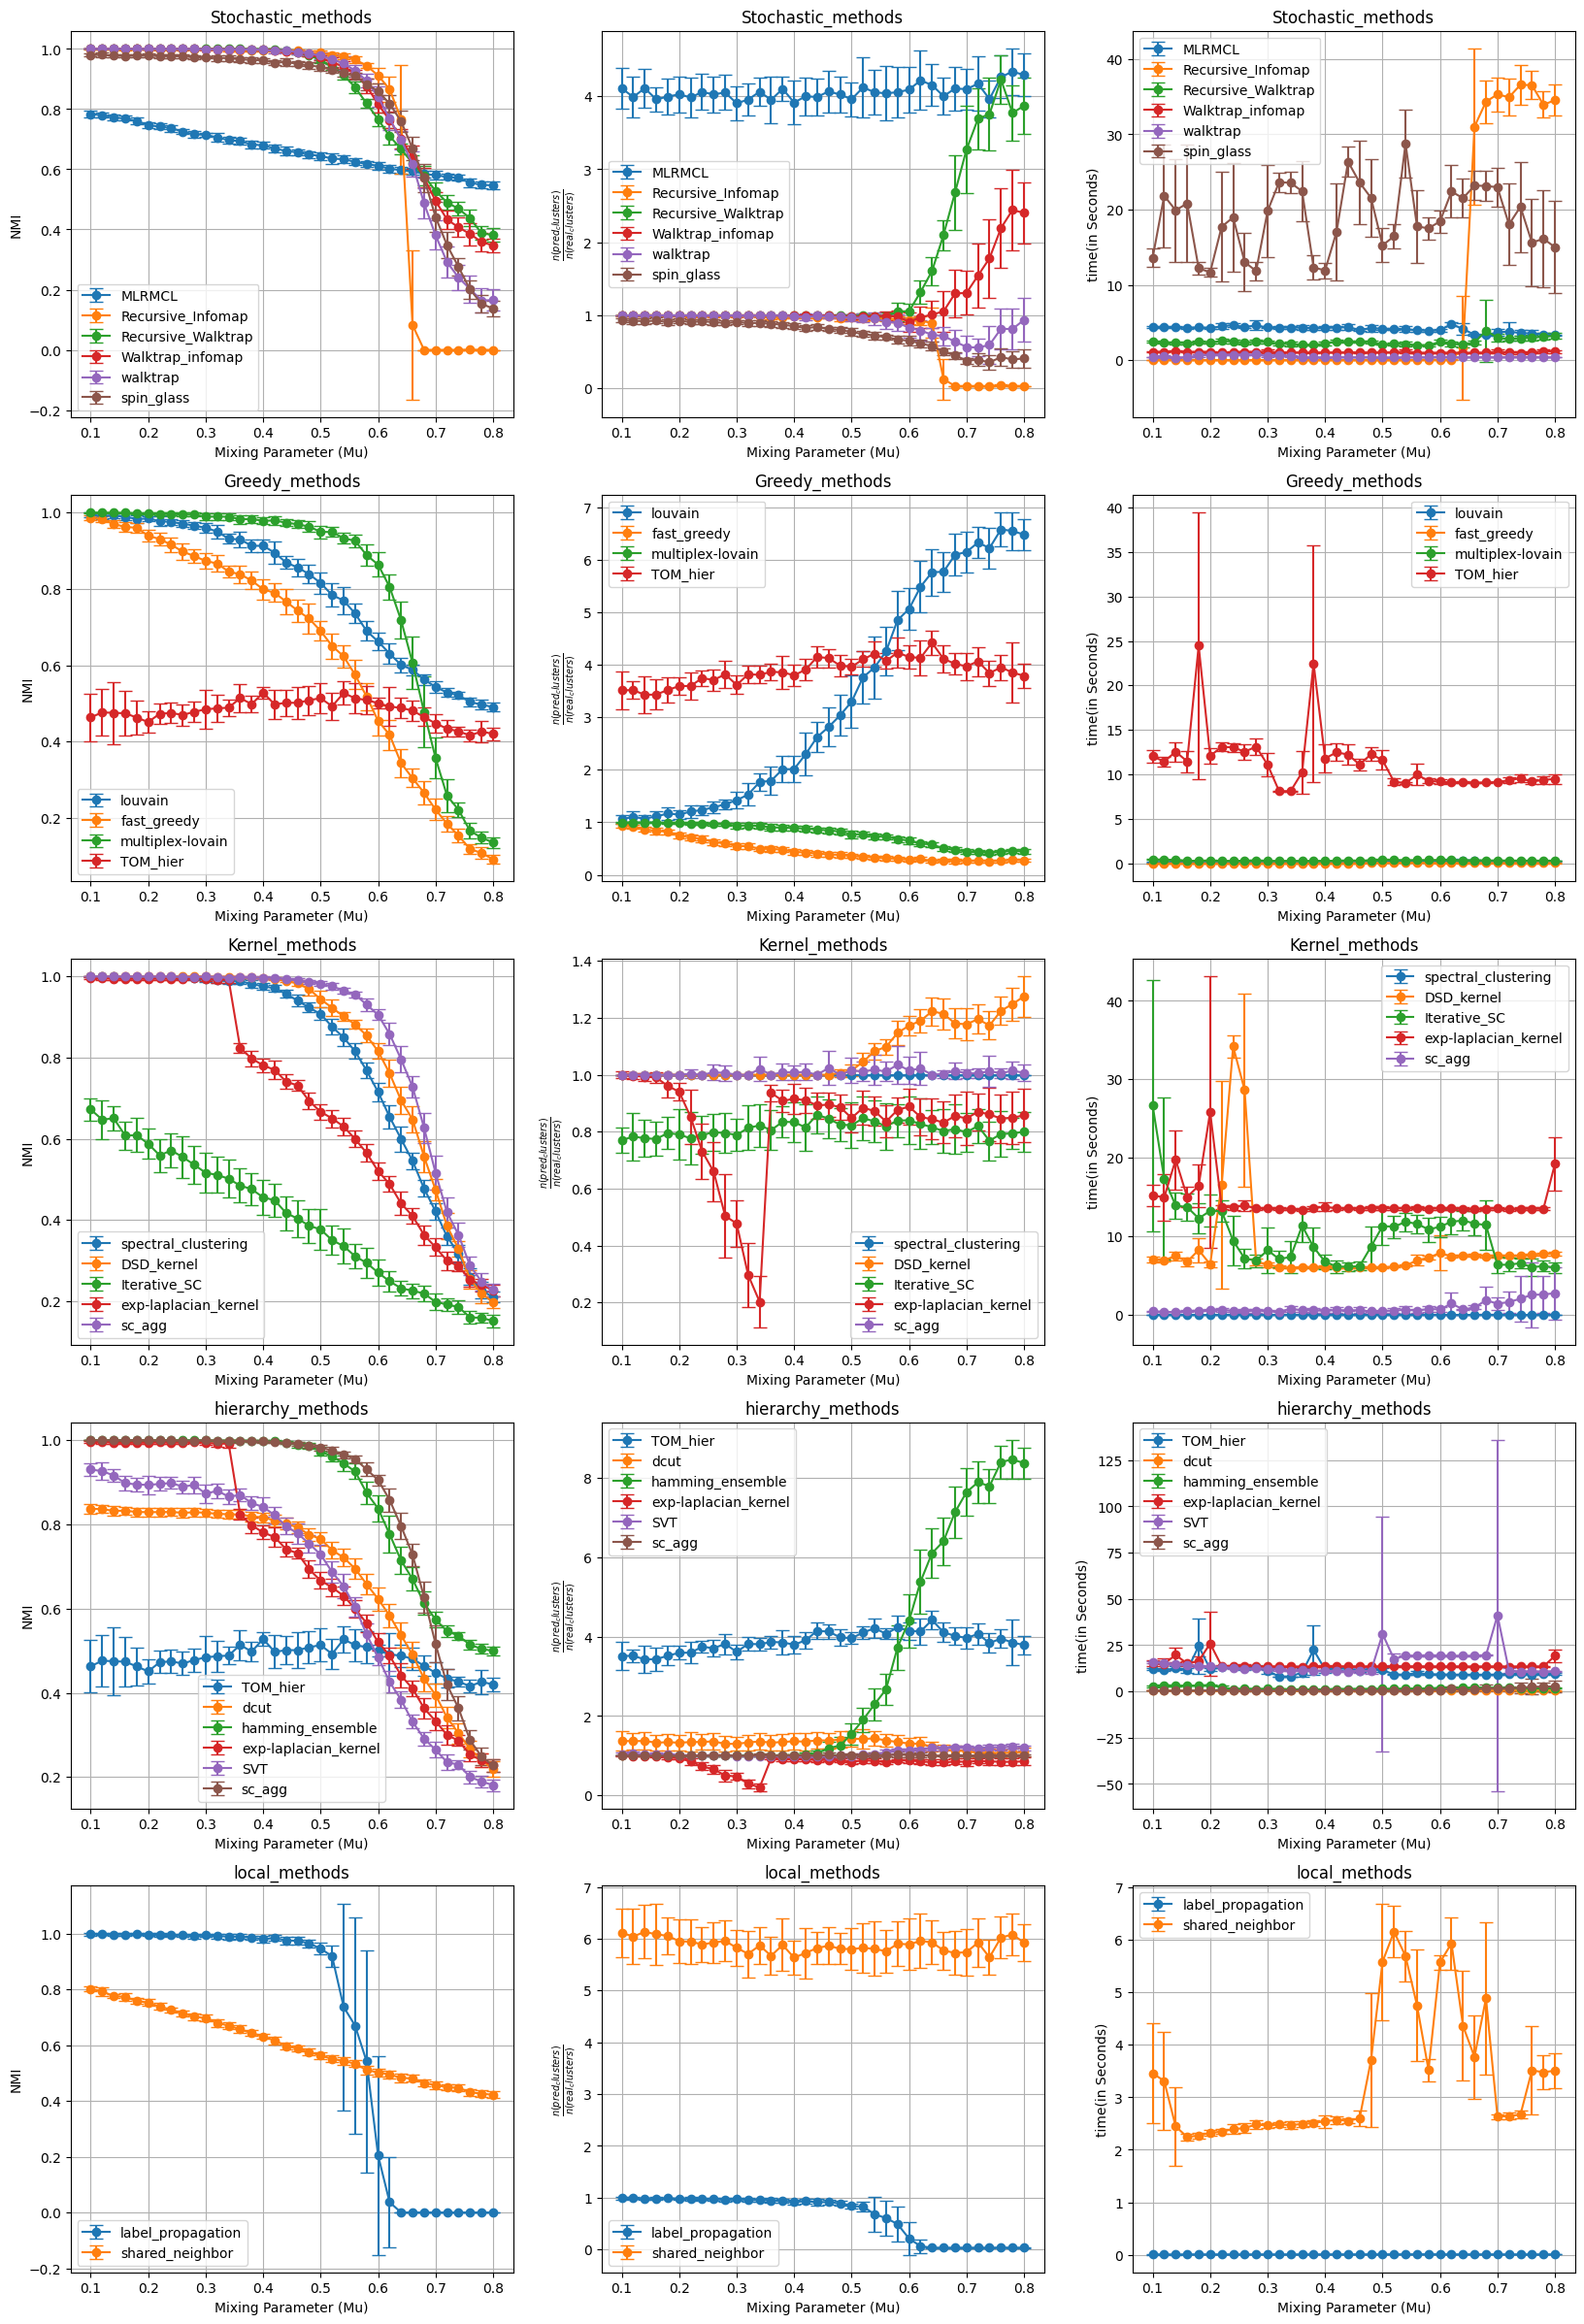

In [62]:
fig,axs=plt.subplots(5,3,figsize=(20,30))
for i in range(5):
    for j in range(3):
        axs[i][j]=functions1[j](methods[i],titles[i],axs[i][j])
plt.show()

In [63]:
fig.patch.set_facecolor('white')

plt.savefig('output_mu.tiff', format='tiff', facecolor=fig.get_facecolor())

<Figure size 640x480 with 0 Axes>

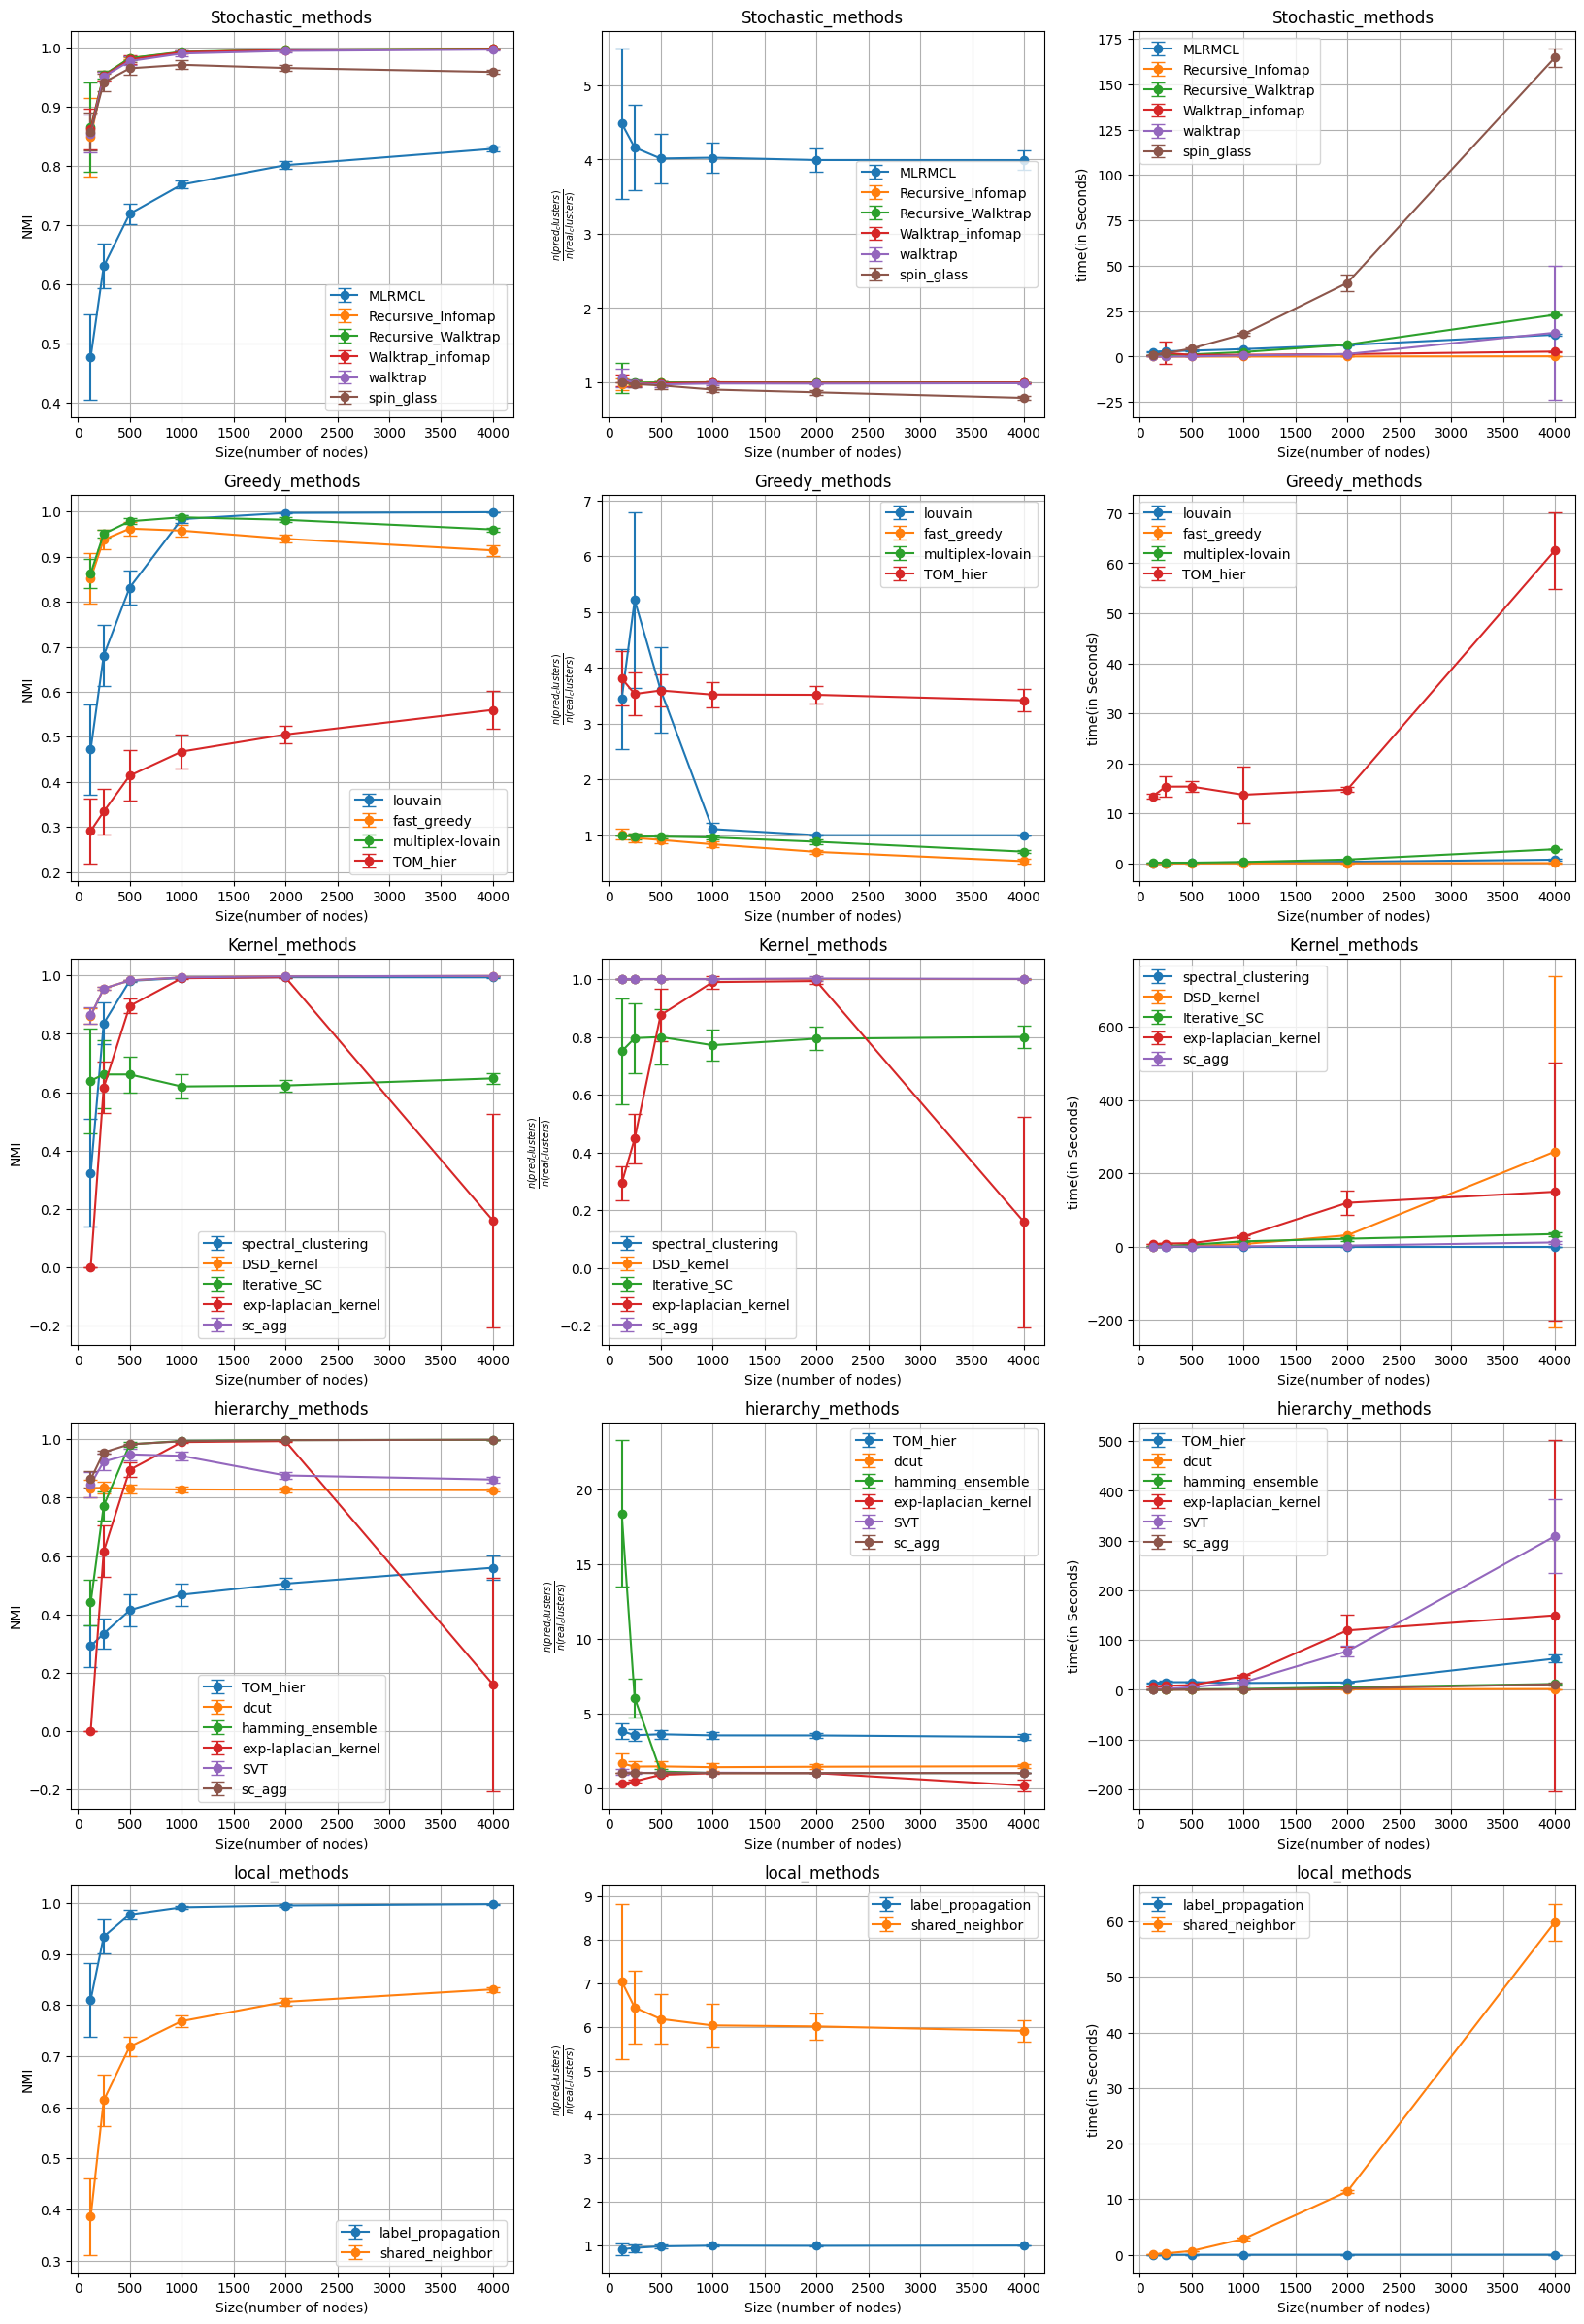

In [64]:
fig,axs=plt.subplots(5,3,figsize=(20,30))
for i in range(5):
    for j in range(3):
        axs[i][j]=functions2[j](methods[i],titles[i],axs[i][j])
plt.show()

In [65]:
#fig.patch.set_facecolor('white')

plt.savefig('output_size.tiff', format='tiff',transparent=False)

<Figure size 640x480 with 0 Axes>

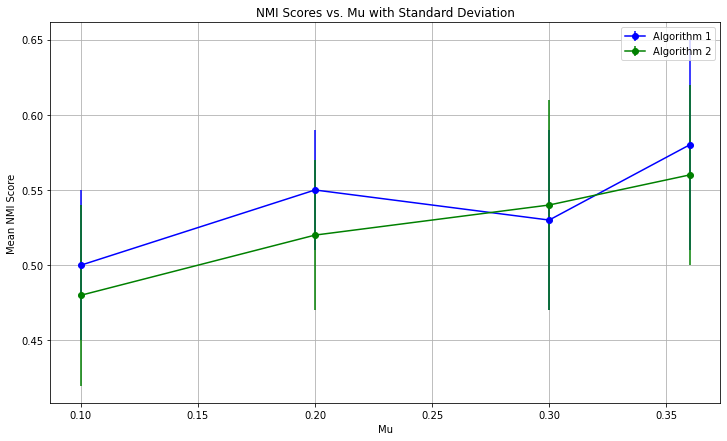

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
mu_values = [0.1, 0.2, 0.3, 0.36]
algorithm1_mean_nmi = [0.5, 0.55, 0.53, 0.58]
algorithm1_std_nmi = [0.05, 0.04, 0.06, 0.07]
algorithm2_mean_nmi = [0.48, 0.52, 0.54, 0.56]
algorithm2_std_nmi = [0.06, 0.05, 0.07, 0.06]

plt.figure(figsize=(12, 7))

# Plot for Algorithm 1
plt.errorbar(mu_values, algorithm1_mean_nmi, yerr=algorithm1_std_nmi, fmt='-o', color='blue', label='Algorithm 1')

# Plot for Algorithm 2
plt.errorbar(mu_values, algorithm2_mean_nmi, yerr=algorithm2_std_nmi, fmt='-o', color='green', label='Algorithm 2')

plt.title('NMI Scores vs. Mu with Standard Deviation')
plt.xlabel('Mu')
plt.ylabel('Mean NMI Score')
plt.legend()
plt.grid(True)
plt.show()



In [14]:
fig=visualise_cc(random_walk_algos,spin_algos,'Random walk')

NameError: name 'random_walk_algos' is not defined

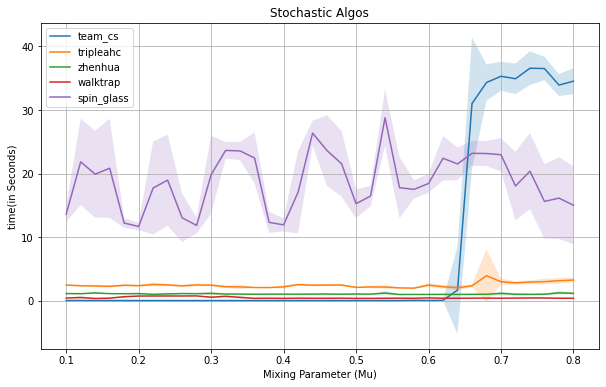

In [ ]:
fig=visualise_time(stochastic_algos,'Stochastic Algos')